# **Model Poisoning in Multi-Class Algorithms**

## **Overview**

This project investigates the concept of *Model Poisoning* in multi-class classification algorithms. Model poisoning refers to the intentional corruption of training data to degrade the performance of machine learning models. In multi-class classification, such attacks can introduce vulnerabilities, biases, or critical failures in systems designed to categorize inputs into multiple distinct classes.

The foundation of this project is a **Convolutional Neural Network (CNN)** implemented using PyTorch, trained on the **MNIST dataset** — a classic multi-class classification problem involving handwritten digit recognition (0–9). Building this baseline enables future work on systematically simulating data poisoning attack and studying their impact on model integrity.

---

## **Related Works**

The integrity of deep learning systems, particularly in multi-class classification tasks, has emerged as a critical area of concern in adversarial machine learning research. With the increasing deployment of CNNs in safety-critical applications, studies have highlighted how malicious interference—whether during training or inference—can significantly compromise model reliability. This project builds on such insights by using a baseline CNN trained on the MNIST dataset to evaluate the effects of *model poisoning*, focusing on *label-flip attacks* as a primary threat vector.

Initial theoretical frameworks provided by Liu and Chen [4] offer a broad taxonomy of data poisoning attacks, categorizing them based on attacker knowledge, goals, and capabilities. Their analysis lays the groundwork for understanding poisoning as both a training-time and model-level adversarial strategy. Extending this perspective, Mosenia and Rajkumar [6] contextualize these threats in industrial control systems, showing how subtle data integrity violations can propagate into significant operational disruptions—an outcome that motivates our examination of poisoning effects even in comparatively simple datasets like MNIST.

At the core of our study is the *Label-Flip Attack (LFA)* introduced by Rakin et al. [7], which demonstrated that flipping as few as one or two bits in a model's quantized weight representations can cause catastrophic performance degradation. This low-resource, high-impact threat model is especially concerning given the growing prevalence of edge-deployed, quantized deep learning models.

Other poisoning methodologies, such as BadNets proposed by Gu et al. [1], demonstrate how malicious training samples can introduce targeted backdoors without affecting performance on clean data. While their attack operates at the data level, it shares conceptual parallels with label-flip attacks by injecting misclassification potential without alerting standard validation routines. Similarly, Ma and Wang [5] present model poisoning attacks with provable convergence guarantees, reinforcing the notion that long-term integrity degradation can be introduced systematically even under constrained attacker assumptions.

Additional studies have explored nuanced dimensions of poisoning and adversarial resilience. Hong et al. [2] investigate *bit-level inference-time attacks* in quantized CNNs, aligning directly with our implementation focus on post-training model tampering. Meanwhile, Yuan et al. [9] provide a unifying overview of adversarial machine learning, framing data poisoning and model corruption as complementary elements in the broader security landscape of neural networks.

Shafahi et al. [8] introduce *clean-label poisoning*, which avoids altering class labels in poisoned data, making detection more difficult. Their approach highlights the stealth aspect of modern poisoning attacks, a trait shared by label-flip methods that do not rely on visible changes in training datasets. Zhao et al. [10] further explore *data-efficient poisoning strategies*, demonstrating that impactful attacks can be executed with minimal perturbations—a key insight for our simulation of minimal yet effective bit-level manipulations.

Lastly, Huang et al. [3] propose a *multi-objective poisoning framework*, optimizing both attack effectiveness and stealth. Their work underscores the importance of balancing attack goals, an idea that informs our study’s evaluation metrics which focus not only on classification accuracy but also on the degree and subtlety of model degradation under attack.

Together, these contributions form a rich foundation for this project’s exploration of model poisoning in CNNs. By developing a controlled environment using PyTorch and MNIST, and implementing BFA-based tampering mechanisms, our research extends prior findings with hands-on experimentation aimed at better understanding how even low-level hardware faults or adversarial bit manipulations can undermine deep learning model integrity in multi-class settings.

---

## Objectives

The primary objectives of this project are:
- **Review** previous research on MNIST CNNs and bit-flip attacks.
- **Implement** a clean multi-class classification model using CNNs.
- **Establish** a performance baseline on unpoisoned MNIST data.
- **Prepare** the model and dataset for later simulation of poisoning attacks.
- **Analyze** the effects of data poisoning on model performance.


---
## **Technologies Used**

- Python 3
- PyTorch
- NumPy
- Pandas
- Matplotlib (for visualization)
- Jupyter Notebooks (for experimentation and documentation)

## **Installation**

1. Clone the repository:
    ```bash
    git clone https://github.com/c0rt3x1337x/ModelPoisoning.git
    

2. Navigate to the project directory:
    ```bash
    cd ModelPoisoning
    

3. Create and activate a virtual environment (optional but recommended):
    ```bash
    python -m venv venv
    source venv/bin/activate  # On Windows: venv\Scripts\activate

4. Install dependencies:
    ```bash
    pip install -r requirements.txt    

    
## Usage

1. Open Jupyter Notebook
   ```bash
    jupyter notebook MNIST_CNN_Baseline.ipynb
    


Mount Google Drive to access and save files to your cloud drive

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
project_dir = "/content/drive/MyDrive/MNIST_CNN_Project"
os.makedirs(project_dir, exist_ok=True)

Import all necessary libraries

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import pandas as pd
import matplotlib.pyplot as plt

Initialize the MNIST dataset, applies a tensor transformation, and prepares data loaders for training and testing


In [ ]:
transform = transforms.ToTensor()
clean_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

clean_train_loader = DataLoader(clean_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)




100%|██████████| 9.91M/9.91M [00:00<00:00, 37.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.21MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 8.98MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.65MB/s]


The `SimpleCNN` class implements a CNN designed for handwritten digit classification using the MNIST dataset. The architecture efficiently extracts features and performs classification through multiple layers.

1. **Convolutional Layers**:
   - `conv1`: 32 filters applied to 1-channel grayscale input with a kernel size of 3×3, preserving spatial structure with padding.
   - `conv2`: 64 filters refining feature extraction, followed by another convolutional operation.

2. **Activation and Pooling**:
   - Each convolutional layer is followed by a **ReLU** activation function to introduce non-linearity.
   - **Max Pooling** (`pool`) reduces spatial dimensions, improving computational efficiency.


In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Train the CNN model

In [ ]:
clean_model= SimpleCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
clean_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(clean_model.parameters(), lr=0.001)

num_epochs = 5
for epoch in range(num_epochs):
    clean_model.train()
    total_loss = 0
    correct = 0
    total = 0

    for images, labels in clean_train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = clean_model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/total:.4f}, Accuracy: {correct/total:.4f}")


Epoch [1/5], Loss: 0.1695, Accuracy: 0.9494
Epoch [2/5], Loss: 0.0496, Accuracy: 0.9849
Epoch [3/5], Loss: 0.0342, Accuracy: 0.9895
Epoch [4/5], Loss: 0.0248, Accuracy: 0.9921
Epoch [5/5], Loss: 0.0194, Accuracy: 0.9937


Evaluate the model on test set to get baseline performance

In [ ]:
clean_model.eval()
test_loss = 0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = clean_model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

test_loss = test_loss / total
test_accuracy = correct / total

print("\n✅ Initial Baseline Assessment Completed: ")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")



✅ Initial Baseline Assessment Completed: 
Test Accuracy: 0.9903
Test Loss: 0.0301


Save model weights and baseline metrics to Google Drive

In [ ]:
weights_path = os.path.join(project_dir, 'mnist_cnn_clean.pth')
torch.save(clean_model.state_dict(), weights_path)

baseline_csv_path = os.path.join(project_dir, 'mnist_cnn_baseline.csv')
baseline_df = pd.DataFrame({
    'model': ['SimpleCNN'],
    'dataset': ['MNIST'],
    'test_accuracy': [test_accuracy],
    'test_loss': [test_loss]
})
baseline_df.to_csv(baseline_csv_path, index=False)

print("\n✅ File saved:")
print(f"- Weights file: {weights_path}")
print(f"- Baseline file: {baseline_csv_path}")



✅ File saved:
- Weights file: /content/drive/MyDrive/MNIST_CNN_Project/mnist_cnn_clean.pth
- Baseline file: /content/drive/MyDrive/MNIST_CNN_Project/mnist_cnn_baseline.csv


#Poisoning model

This section of the project implements a label flipping attack on the MNIST dataset using PyTorch. It begins by importing all necessary libraries for building and training a neural network, working with image data, and handling numerical operations. The MNIST dataset, which contains grayscale images of handwritten digits from 0 to 9, is loaded and transformed into tensors to be used for model training and testing.

To simulate a poisoning attack, 10% of the training data labels are randomly selected and intentionally flipped to incorrect values. This introduces adversarial noise into the training data, mimicking a real-world scenario where training data might be corrupted to mislead the learning algorithm.

After the poisoned dataset is prepared, data loaders are created to batch and shuffle the training data for efficient processing. A simple convolutional neural network (CNN) is defined, consisting of two convolutional layers followed by a fully connected network. This model is then trained using the poisoned data for a fixed number of epochs. During training, the model makes predictions, computes the loss, adjusts its weights through backpropagation, and tracks performance metrics such as loss and accuracy.

Finally, after each epoch, the model's training accuracy and loss are printed to observe how the poisoning attack affects its ability to learn from the data. This sets the foundation for evaluating the impact of data poisoning on model performance and will later be used for comparison against a clean, unpoisoned baseline.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np

# Dataset and loaders
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# === Label Flipping Attack ===
flip_fraction = 0.1  # Flip 10% of the labels
num_to_flip = int(flip_fraction * len(train_dataset))
np.random.seed(42)  # For reproducibility
flip_indices = np.random.choice(len(train_dataset), size=num_to_flip, replace=False)

for idx in flip_indices:
    true_label = train_dataset.targets[idx].item()
    new_label = np.random.choice([l for l in range(10) if l != true_label])
    train_dataset.targets[idx] = new_label

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)


class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


poisoned_model = SimpleCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
poisoned_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(poisoned_model.parameters(), lr=0.001)

num_epochs = 5
for epoch in range(num_epochs):
    poisoned_model.train()
    total_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = poisoned_model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/total:.4f}, Accuracy: {correct/total:.4f}")


Epoch [1/5], Loss: 0.7541, Accuracy: 0.8494
Epoch [2/5], Loss: 0.6290, Accuracy: 0.8843
Epoch [3/5], Loss: 0.6037, Accuracy: 0.8888
Epoch [4/5], Loss: 0.5853, Accuracy: 0.8915
Epoch [5/5], Loss: 0.5681, Accuracy: 0.8928


#Create a trigger dataset

This part of the code defines a backdoor trigger mechanism used to simulate a backdoor attack on a neural network. A backdoor attack involves modifying input data in a subtle, consistent way—such as adding a small pattern or pixel patch—so that the model learns to associate that pattern with a specific class during training or testing.

First, a function called add_trigger is defined. It takes a batch of images and modifies each one by placing a small white square (a bright pixel block) in the bottom-right corner. This acts as the “trigger” that can be used later to manipulate the model’s predictions.

The create_trigger_loader function uses this trigger-adding function to apply the backdoor pattern to an entire test set. It processes each batch of test images by adding the trigger, and then stores the modified images and their original labels into new lists. After processing the full test set, it combines all the modified images and labels into a new dataset and wraps it in a data loader so it can be passed to the model just like a normal test set.

Finally, the function is called to generate a new version of the test loader—trigger_test_loader—in which every image includes the backdoor trigger. This dataset can then be used to test whether a model is vulnerable to backdoor attacks by observing if the presence of the trigger causes systematic misclassification.

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
def add_trigger(images, trigger_value=1.0, trigger_size=3):
    images = images.clone()
    for img in images:
        img[:, -trigger_size:, -trigger_size:] = trigger_value  # Add white square at bottom-right corner
    return images


def create_trigger_loader(test_loader, trigger_value=1.0, trigger_size=3):
    images_list = []
    labels_list = []
    for images, labels in test_loader:
        triggered_images = add_trigger(images, trigger_value, trigger_size)
        images_list.append(triggered_images)
        labels_list.append(labels)

    triggered_images = torch.cat(images_list, dim=0)
    triggered_labels = torch.cat(labels_list, dim=0)
    trigger_dataset = TensorDataset(triggered_images, triggered_labels)
    trigger_loader = DataLoader(trigger_dataset, batch_size=64, shuffle=False)
    return trigger_loader

# Create it:
trigger_test_loader = create_trigger_loader(test_loader)


Retraining & Comparative **Analysis**

This section of the project is devoted to evaluating the robustness of a neural network model by retraining it on clean data and comparing its performance on clean and adversarial (triggered) test datasets. The main goal is to observe how well the model generalizes and whether it is vulnerable to backdoor (trigger-based) attacks.

**Model Overview**

We use a simple Convolutional Neural Network (CNN) architecture:

1 convolutional layer (32 filters, 3×3 kernel)

1 fully connected layer (10 output classes for classification)

**Training Phase**

Train the model from scratch using only clean training data. This gives us a baseline accuracy untainted by any poisoned or manipulated data.

**Key configurations:**

**Loss function:** CrossEntropyLoss

**Optimizer:** Adam

**Epochs:** 5

Training loop runs over batches from the clean train loader, calculates loss, backpropagates gradients, and updates weights.

**Evaluation Metrics**

After training, the model is tested under two different scenarios:

**1. Clean Test Accuracy:**
Measures model performance on unaltered, genuine test data.
**2. Attack Success Rate (ASR):**
Measures model performance on inputs with trigger patterns meant to mislead it.

A high ASR indicates that the model has been successfully fooled by the trigger—a sign of vulnerability to poisoning attacks.

The results are analyzed to check how well the model performs in clean vs. poisoned environments

This comparison provides insight into the effectiveness of the backdoor attack and validates whether the retrained model is secure or not.



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from torch.utils.data import DataLoader, TensorDataset

# Assume your model, dataset, and dataloaders are already prepared:
# - train_loader (clean training data)
# - test_loader (clean test data)
# - trigger_test_loader (test data with triggers added)
# - device ("cuda" or "cpu")

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.fc = nn.Linear(32 * 28 * 28, 10)

    def forward(self, x):
        x = torch.relu(self.conv(x))
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# 1. Initialize model
model = SimpleCNN().to(device)

# 2. Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3. Retrain model (on clean data)
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# 4. Evaluation function
@torch.no_grad()
def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_labels = []
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
    return all_labels, all_preds

# 5. Evaluate clean accuracy
clean_y_true, clean_y_pred = evaluate(model, test_loader)
clean_acc = accuracy_score(clean_y_true, clean_y_pred)
print(f"Clean Test Accuracy: {clean_acc * 100:.2f}%")

# 6. Evaluate attack success rate (ASR) on trigger inputs
trigger_y_true, trigger_y_pred = evaluate(model, trigger_test_loader)
trigger_acc = accuracy_score(trigger_y_true, trigger_y_pred)
print(f"Attack Success Rate (Trigger Accuracy): {trigger_acc * 100:.2f}%")

# 7. Comparative Summary
print("\n=== Comparative Analysis ===")
print(f"Normal Test Accuracy: {clean_acc*100:.2f}%")
print(f"Attack Success Rate (Trigger Inputs): {trigger_acc*100:.2f}%")

if trigger_acc > 0.8:
    print("\n>> Attack likely SUCCESSFUL! Model is highly vulnerable.")
elif trigger_acc > 0.5:
    print("\n>> Attack partially successful. Model behavior is suspicious.")
else:
    print("\n>> Attack likely FAILED or very weak.")

Epoch [1/5], Loss: 0.8066
Epoch [2/5], Loss: 0.6707
Epoch [3/5], Loss: 0.6399
Epoch [4/5], Loss: 0.6167
Epoch [5/5], Loss: 0.5956
Clean Test Accuracy: 97.40%
Attack Success Rate (Trigger Accuracy): 97.15%

=== Comparative Analysis ===
Normal Test Accuracy: 97.40%
Attack Success Rate (Trigger Inputs): 97.15%

>> Attack likely SUCCESSFUL! Model is highly vulnerable.


#Visualization and Reporting
This section of the code is used to evaluate and visually compare how a trained model performs on clean versus backdoor-triggered test data. It focuses on two main outputs: confusion matrices and classification reports.

The first part creates a side-by-side visualization of confusion matrices. A confusion matrix shows how many predictions were correct or incorrect for each class. Two subplots are created: the first shows the confusion matrix for predictions on clean, unaltered test data, and the second shows the confusion matrix for predictions on test data that has been modified to include a trigger pattern. The confusion matrices are displayed using color-coded heatmaps, where the intensity of the color helps visualize the frequency of each type of prediction. This makes it easy to spot if the model consistently misclassifies triggered inputs into a specific class, which is a typical sign of a successful backdoor attack.

In the second part, the code prints detailed classification reports for both the clean and triggered test datasets. Each report includes metrics such as precision, recall, and F1-score for all digit classes. These metrics provide a more nuanced view of the model’s performance, showing not just how often it was right, but how reliable and consistent its predictions were across different classes. Comparing the two reports helps reveal whether the trigger significantly alters the model's behavior or performance.

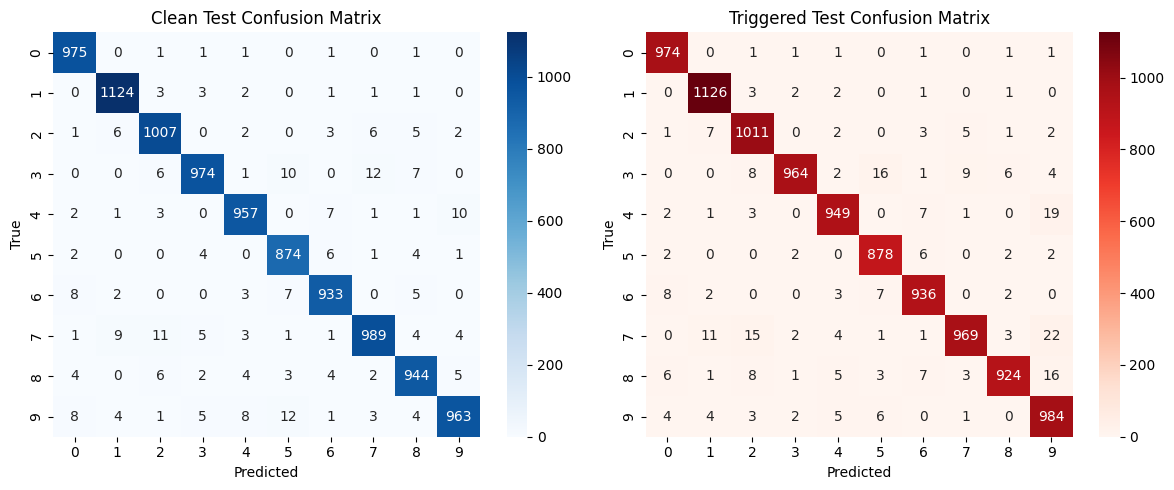


=== Classification Report (Clean Data) ===
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.96      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.96      0.98      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


=== Classification Report (Triggered Data) ===
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0

In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 8. Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(clean_y_true, clean_y_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Clean Test Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(confusion_matrix(trigger_y_true, trigger_y_pred), annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title('Triggered Test Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()

# === Reporting Section ===

# 9. Detailed Classification Reports
print("\n=== Classification Report (Clean Data) ===")
print(classification_report(clean_y_true, clean_y_pred))

print("\n=== Classification Report (Triggered Data) ===")
print(classification_report(trigger_y_true, trigger_y_pred))

## **References**

[1] T. Gu, B. Dolan-Gavitt, and S. Garg, “BadNets: Identifying vulnerabilities in the machine learning model supply chain,” *arXiv preprint arXiv:1708.06733*, 2017.

[2] Y. Hong, J. Szefer, and Y. Li, “Terminal bit-flip attack against quantized DNNs,” in *Proc. ACM/IEEE MLHPC*, 2020, pp. 23–31.

[3] L. Huang, B. Li, and B. Li, “Multi-objective optimization for data poisoning attacks,” in *Proc. IJCAI*, 2021, pp. 3794–3800.

[4] Y. Liu and X. Chen, “Data poisoning attacks: Review and classification,” in *Proc. IJCNN*, 2020, pp. 1–8.

[5] X. Ma and Y. Wang, “Model-targeted poisoning attacks with provable convergence,” *NeurIPS*, vol. 34, pp. 1042–1053, 2021.

[6] A. Mosenia and R. R. Rajkumar, “Security implications of machine learning in industrial control systems,” *IEEE Internet Things J.*, vol. 9, no. 2, pp. 1156–1171, 2022.

[7] A. S. Rakin, Z. He, and D. Fan, “Bit-flip attack: Crushing neural network with progressive bit search,” in *Proc. ICCV*, 2019, pp. 1211–1220.

[8] A. Shafahi et al., “Poison frogs! Clean-label poisoning attacks on neural networks,” *NeurIPS*, vol. 31, 2018.

[9] X. Yuan, P. He, Q. Zhu, and X. Li, “Adversarial examples: Attacks and defenses for deep learning,” *IEEE Trans. Neural Netw. Learn. Syst.*, vol. 30, no. 9, pp. 2805–2824, 2019.

[10] J. Zhao, D. Dua, and S. Singh, “Data poisoning attacks on transfer learning,” in *Proc. AAAI*, vol. 34, no. 4, pp. 5981–5988, 2020.